# Introduction

https://archive.ics.uci.edu/ml/datasets/Bank+Marketing
    

## 1. Bank Marketing dataset:
It contains 41188 and 20 attributes.

1. import all the specific libraries that will be used.

In [3]:
import pandas as pd
import numpy as np
import pylab as pl
import scipy.stats as stats
import researchpy as rp
import sklearn
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from imblearn.over_sampling import SMOTE


Missing Values will be declared. This data set contains 'unknown' value as missing values

In [4]:
unknown_values = ['unknown']

Read the dataset from the csv file

In [5]:
old_dataset = pd.read_csv('bank-additional-full.csv', sep = ';', na_values = unknown_values)
old_dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Check the total NULL values in the dataset

In [6]:
old_dataset.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

Drop the NULL rows.

In [7]:
df = old_dataset.dropna()

Convert the 'duration' from seconds to minutes to have a better data visualisation.

In [10]:
df['duration'] = df['duration'].apply(lambda n:n/60).round(2)

<ipython-input-10-6821f7cd80eb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration'] = df['duration'].apply(lambda n:n/60).round(2)


Divide the 'age' into categories of Teenager, Adult and Elder to have a better understanding and insert them into the dataset as 'Age Group'

In [ ]:
category = pd.cut(df.age, bins = [0,20, 55, 100], labels = ['Teenage', 'Adult', 'Elder'])
df.insert(5, 'Age Group', category)

**DATA VISUALISATION AND CHI-SQUARE TEST**
1. Job

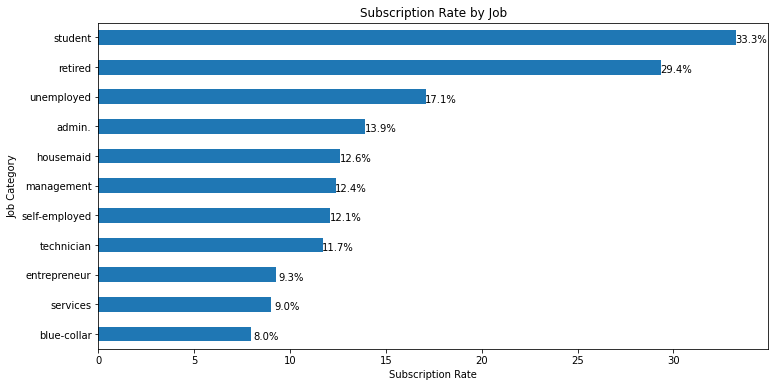

In [11]:
count_job = pd.crosstab(df['y'],df['job']).apply(lambda x: x/x.sum() * 100)
count_job = count_job.transpose()
plot_job = count_job['yes'].sort_values(ascending = True).plot(kind ='barh',
                                                                           figsize = (12,6))
                                                                               
plt.title('Subscription Rate by Job')
plt.xlabel('Subscription Rate')
plt.ylabel('Job Category')

# Label each bar
for rec, label in zip(plot_job.patches,
                      count_job['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_job.text(rec.get_width()+0.8, 
                  rec.get_y()+ rec.get_height()-0.5, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

In [15]:
crosstab, test_results, expected = rp.crosstab(df["job"], df["y"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

crosstab

y               
y                 no    yes     All
job                                
admin.         24.67   3.99   28.66
blue-collar    17.13   1.48   18.61
entrepreneur    3.24   0.33    3.57
housemaid       1.98   0.29    2.26
management      6.64   0.94    7.58
retired         2.82   1.17    3.99
self-employed   3.15   0.43    3.58
services        8.52   0.85    9.37
student         1.33   0.67    2.00
technician     15.85   2.10   17.95
unemployed      2.01   0.41    2.42
All            87.34  12.66  100.00

In [14]:
test_results

,Chi-square test,results
0,Pearson Chi-square ( 10.0) =,730.2239
1,p-value =,0.0000
2,Cramer's V =,0.1548


2. Age Group

In [ ]:
sns.countplot(df['Age Group'])

In [ ]:
crosstab, test_results, expected = rp.crosstab(df["Age Group"], df["y"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

crosstab

In [ ]:
test_results

3. Marital

In [ ]:
sns.countplot(df['marital'])

In [ ]:
crosstab, test_results, expected = rp.crosstab(df["marital"], df["y"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

crosstab

In [ ]:
test_results

4. Education

In [ ]:
df.groupby(['education','y']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

In [ ]:
crosstab, test_results, expected = rp.crosstab(df["education"], df["y"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

crosstab

In [ ]:
test_results

5. Default

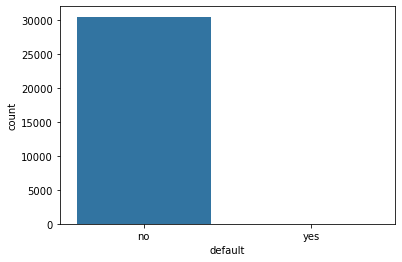

In [16]:
sns.countplot(df['default'])

In [ ]:
crosstab, test_results, expected = rp.crosstab(df["default"], df["y"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

crosstab

In [ ]:
test_results

6. Housing

In [ ]:
sns.countplot(df['housing'])

In [ ]:
crosstab, test_results, expected = rp.crosstab(df["housing"], df["y"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

crosstab

In [ ]:
test_results

7. Loan

In [ ]:
sns.countplot(df['loan'])

In [ ]:
crosstab, test_results, expected = rp.crosstab(df["loan"], df["y"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

crosstab

In [ ]:
test_results

8. Month

In [ ]:
df.groupby(['month','y']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

In [ ]:
crosstab, test_results, expected = rp.crosstab(df["month"], df["y"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

crosstab

In [ ]:
test_results

9. Day of Week

In [ ]:
df.groupby(['day_of_week','y']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

In [ ]:
crosstab, test_results, expected = rp.crosstab(df["day_of_week"], df["y"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

crosstab

In [ ]:
test_results

10. Poutcome

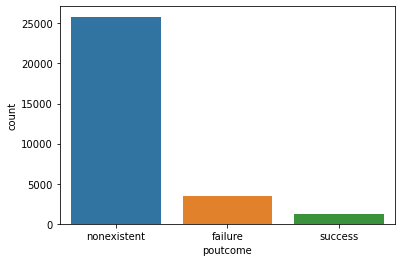

In [17]:
sns.countplot(df['poutcome'])

In [ ]:
crosstab, test_results, expected = rp.crosstab(df["poutcome"], df["y"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

crosstab

In [ ]:
test_results

11. The Distribution of Age

In [ ]:
dist_age = plt.figure(figsize = (10,6))

ra1 = dist_age.add_subplot(1,2,1) 

ra1.hist(df['age'])
ra1.set_title('The Distribution of Age')

plt.tight_layout() 
plt.show()

12. The Distribution of Duration and Campaign (Box plot)

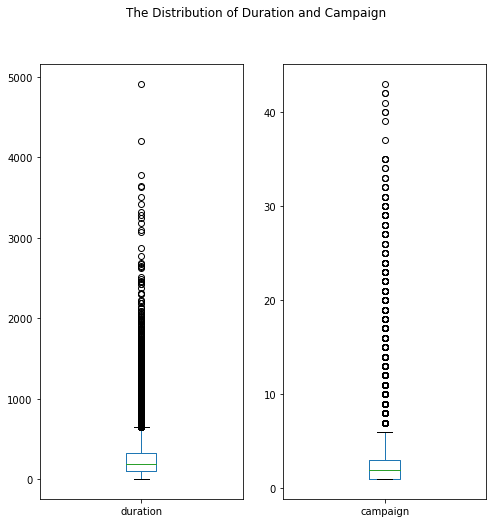

In [8]:
dist_dur_cam = df[['duration','campaign']].plot(kind = 'box', 
                                                      figsize = (8,8),
                                                      subplots = True, layout = (1,2),
                                                      sharex = False, sharey = False,
                                                      title='The Distribution of Duration and Campaign')
plt.show()

13. The Relationship between the Duration of Calls and Number of Calls with the Response Result

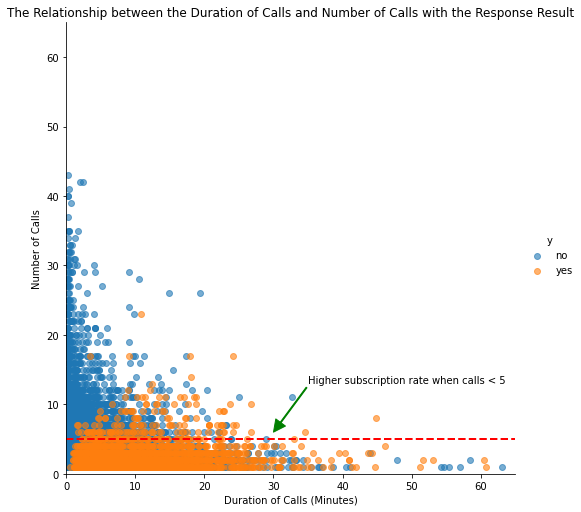

In [11]:
dur_cam = sns.lmplot(x='duration', y='campaign',data = df,
                     hue = 'y',
                     fit_reg = False,
                     scatter_kws={'alpha':0.6}, height =7)

plt.axis([0,65,0,65])
plt.ylabel('Number of Calls')
plt.xlabel('Duration of Calls (Minutes)')
plt.title('The Relationship between the Duration of Calls and Number of Calls with the Response Result')

# Annotation
plt.axhline(y=5, linewidth=2, color="r", linestyle='--')
plt.annotate('Higher subscription rate when calls < 5',xytext = (35,13),
             arrowprops=dict(color = 'g', width=1),xy=(30,6))
plt.show()


**MODEL TRAINING AND VALIDATION**

Label Encoder

In [ ]:
mappings = []

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

label_df = df[['default', 'housing', 'loan', 'month', 'campaign', 'poutcome', 'euribor3m', 'y']]

for i, col in enumerate(label_df):
    if label_df[col].dtype == 'object':
        label_df[col] = label_encoder.fit_transform(np.array(label_df[col].astype(str)).reshape((-1,)))
        mappings.append(dict(zip(label_encoder.classes_, range(1, len(label_encoder.classes_)+1))))

SMOTE Oversampling technique

In [12]:
X = label_df.loc[:, label_df.columns != 'y']
y = label_df.loc[:, label_df.columns == 'y']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

NameError: name 'label_df' is not defined

Undersampling Technique

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

y = label_df['y']
x = label_df.drop(['y'], axis=1)
under_sampler = RandomUnderSampler(random_state=35, sampling_strategy=0.5)
sampled_x, sampled_y = under_sampler.fit_resample(x, y)
X_train, X_test, y_train, y_test = train_test_split(sampled_x, sampled_y, test_size=0.3, random_state=None)

# we can Check the numbers of our data
num_no = sampled_y.value_counts()[0]
num_yes = sampled_y.value_counts()[1]
num_yes_pct = num_yes/(num_no + num_yes)
num_no_pct = 1 - num_yes_pct
print(f'number of yes in undersampled data: {num_yes}')
print(f'number of no in undersampled data: {num_no}')
print(f'number of yes in percentage: {num_yes_pct}')
print(f'number of no in percentage: {num_no_pct}')

**Data preprocessing**

Basic steps are performed to evaluate the data

In [13]:
dataset = pd.read_csv('bank-additional-full.csv', delimiter=';', na_values=['unknown']).dropna()

In [ ]:
age_group = pd.cut(dataset['age'], bins=[0, 30, 55, 100], labels=[1, 2, 3])
dataset.insert(5, 'Age Group', age_group)

'Housing', 'Default', 'Loan', and 'y'(Result) has been mapped into numerical using one hot encoding

In [ ]:
dataset['housing'] = dataset['housing'].map({'yes': 1, 'no': 0})
dataset['default'] = dataset['default'].map({'yes': 1, 'no': 0})
dataset['loan'] = dataset['loan'].map({'yes': 1, 'no': 0})
dataset['y'] = dataset['y'].map({'no': 0, 'yes': 1})

'Month' and 'poutcome' has been mapped out.

In [ ]:
dataset['month'] = dataset['month'].map({
    'jan': 1, 
    'feb': 2, 
    'mar': 3, 
    'apr': 4, 
    'may': 5, 
    'jun': 6, 
    'jul': 7, 
    'aug': 8, 
    'sep': 9, 
    'oct': 10, 
    'nov': 11, 
    'dec': 12}).astype({'month': 'category'})

dataset['poutcome'] = dataset['poutcome'].map({
    'failure': 1, 'nonexistent': 2, 'success': 3
}).astype({'poutcome': 'category'})

Only 'default', 'housing', 'loan', 'month', 'campaign', 'poutcome' and 'euribor3m' will be taken into model predictions

In [ ]:
y = dataset['y']
x = dataset.drop(['age', 'age_group', 'marital', 'job', 'contact', 'education', 'day_of_week', 'duration', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'nr.employed', 'y'], axis=1)

In [ ]:
x.head()

Undersampling technique has been used.

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

under_sampler = RandomUnderSampler(random_state=35, sampling_strategy=0.5)
sampled_x, sampled_y = under_sampler.fit_resample(x, y)
X_train, X_test, y_train, y_test = train_test_split(sampled_x, sampled_y, test_size=0.3, random_state=35)

# we can Check the numbers of our data
num_no = sampled_y.value_counts()[0]
num_yes = sampled_y.value_counts()[1]
num_yes_pct = num_yes/(num_no + num_yes)
num_no_pct = 1 - num_yes_pct
print(f'number of no in undersampled data: {num_no}')
print(f'number of yes in undersampled data: {num_yes}')
print(f'number of yes in percentage: {num_yes_pct}')
print(f'number of yes in percentage: {num_no_pct}')

1. Logistic Regression

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

log_reg.score(X_train,y_train)
y_pred = log_reg.predict(X_test)
print(classification_report(y_test, y_pred))

True negative, True positive, False negative and False positive results

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(f'True negative: {tn}')
print(f'True positive: {tp}')
print(f'False negative: {fn}')
print(f'False positive: {fp}')

Precision, Recall, F1 score and Accuracy

In [ ]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 score: {f1}')
print(f'Accuracy: {accuracy}')

ROC curve

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, log_reg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Hyperparameters Tuning for Logistic Regression

c_space = np.logspace(-10, 8, 15)
param_grid = {'C': c_space}
log_reg = LogisticRegression()
log_reg_cv = GridSearchCV(log_reg, param_grid, cv=5)
log_reg_cv.fit(X_train,y_train)

print("Tuned Logistic Regression Parameters: {}".format(log_reg_cv.best_params_))
print("Best score is {}".format(log_reg_cv.best_score_))

Classification report after Grid Search

In [ ]:
log_reg_cv.score(X_train,y_train)
y_pred = log_reg_cv.predict(X_test)
print(classification_report(y_test, y_pred))

Precision, recall, F1 score and Accuracy

In [ ]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 score: {f1}')
print(f'Accuracy: {accuracy}')

ROC Curve

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, log_reg_cv.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, log_reg_cv.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

2. KNeighborsClassifier

In [ ]:
KN = KNeighborsClassifier(n_neighbors=5)
KN.fit(X_train,y_train)

KN.score(X_train,y_train)
y_pred = KN.predict(X_test)
print(classification_report(y_test, y_pred))

Precision, recall, F1 score and Accuracy

In [ ]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 score: {f1}')
print(f'Accuracy: {accuracy}')

ROC curve

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
KN_roc_auc = roc_auc_score(y_test, KN.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, KN.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN Neighbour (area = %0.2f)' % KN_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

3. GaussianNB

In [ ]:
GNB = GaussianNB()
GNB.fit(X_train,y_train)

GNB.score(X_train,y_train)
y_pred = GNB.predict(X_test)
print(classification_report(y_test, y_pred))

Precision, recall, F1 score and Accuracy

In [ ]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 score: {f1}')
print(f'Accuracy: {accuracy}')

ROC curve

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
KN_roc_auc = roc_auc_score(y_test, GNB.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, GNB.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Gaussian NB(area = %0.2f)' % KN_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Gaussian_NB_ROC')
plt.show()

4. DecisionTreeClassifier **You insert here ur code ba**

Comparison between the Classification Algorithms

In [ ]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

In [ ]:
results_c = []
names_c = []

for name, model in models:
    # define how to split off validation data ('kfold' how many folds)
    kfold = KFold(n_splits=10, random_state=None)    
    # train the model
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')    
    results_c.append(cv_results)
    names_c.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

In [ ]:
fig = plt.figure()
fig.suptitle('Perfomance of Classification Algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results_c)
ax.set_xticklabels(names_c)
plt.show()